In [1]:
#How to choose p,d, & q for ARIMA Model
#method -1 : ACF & PACF plots.

#method -2 : Grid Search CV & Random Search CV

In [2]:
#If the auto-correlation plotu shows positive autocorrelation at the first lag (lag-1),
# then it suggests to use the AR terms in relation to the lag.

In [3]:
#If the autocorrelation plot shows negative autocorrelation at the first lag, then it
#suggests using MA terms.

In [4]:
#Typically a sharp drop after lag-k suggests an AR-k model should be used.
#If there is a gradual decline, it suggests an MA model.

In [5]:
#Identification of an AR model is often best done with the PACF.
#Identification of an MA model is often best done with the ACF rather than the PACF.
#AIC is used to penalise the more complex models to minimize the overfitting.

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset
df1 = pd.read_csv('/content/sample_data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('/content/sample_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [8]:
!pip install pmdarima
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [9]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
#for stationary dataset
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.056, Time=0.94 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 07 May 2024   AIC                           2459.074
Time:                        11:46:36   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
stepwise_fit1 = auto_arima(df1['Thousands of Passengers'],start_p = 1,star_q = 1,max_p = 4,max_q = 4,seasonal=True,trace=True,m=12) #m=no. of periods in a seasonal data

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1024.121, Time=1.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.53 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.15 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.47 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.20 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [13]:
stepwise_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 07 May 2024   AIC                           1019.178
Time:                                     11:53:13   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [16]:
# # Load a non-stationary dataset
df2 = pd.read_csv('/content/sample_data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'MS'

# Load a stationary dataset
df1 = pd.read_csv('/content/sample_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]



# ARMA Model

<Axes: xlabel='Date'>

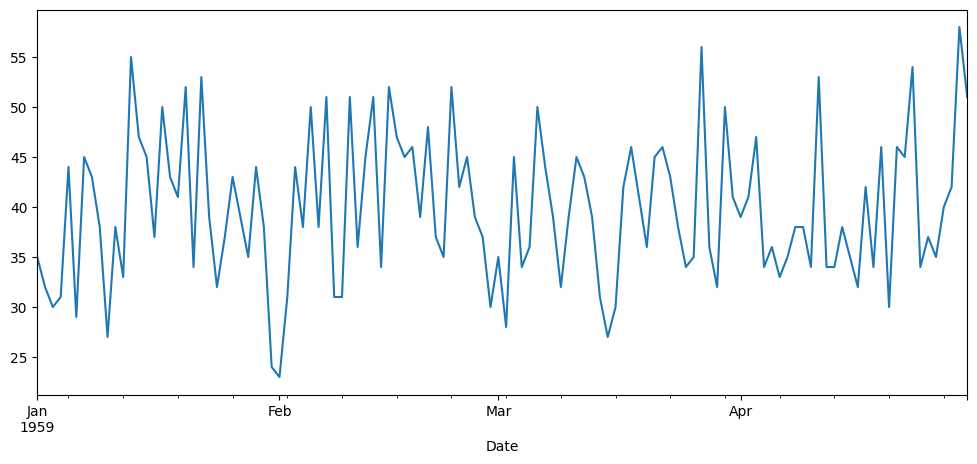

In [17]:
#stationary datasets
df1['Births'].plot(figsize=(12,5))

In [18]:
#Augmanted Dickey fuller test for stationarity

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [19]:
adf_test(df1['Births'])
#ARMA model works for only stationary dataset

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [21]:
auto_arima(df1['Births'],start_p = 1,star_q = 1,max_p = 4,max_q = 4,seasonal=False,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=1.37 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.828 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 07 May 2024   AIC                            823.489
Time:                        13:28:48   BIC                            829.064
Sample:                    01-01-1959   HQIC                           825.753
                         - 04-30-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [25]:
# Import the new ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# Change the line where the model is created to:
model = ARIMA(train['Births'], order=(2, 0,2))
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -307.812
Date:                Tue, 07 May 2024   AIC                            627.625
Time:                        13:33:59   BIC                            642.624
Sample:                    01-01-1959   HQIC                           633.673
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7571      1.017     39.091      0.000      37.764      41.750
ar.L1         -0.4654      1.003     -0.464      0.643      -2.431       1.501
ar.L2          0.5086      0.940      0.541      0.589      -1.334       2.351
ma.L1          0.5613     11.784      0.048      0.962     -22.535      23.657
ma.L2         -0.4385      5.086     -0.086      0.931     -10.407       9.530
sigma2        54.3790    623.600      0.087      0.931   -1167.855    1276.613
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.96   Prob(JB):                         0.37
Heteroskedasticity (H):               0.92   Skew:                             0.16
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
start = len(train)
end = len(train)+len(test)-1

In [28]:
predictions = results.predict(start,end).rename('ARIMA 2,0,2 predictions')

In [29]:
predictions

1959-04-01    40.534982
1959-04-02    39.549286
1959-04-03    40.249478
1959-04-04    39.422273
1959-04-05    40.163363
1959-04-06    39.397742
1959-04-07    40.130977
1959-04-08    39.400336
1959-04-09    40.113297
1959-04-10    39.409882
1959-04-11    40.099862
1959-04-12    39.420991
1959-04-13    40.087859
1959-04-14    39.432226
1959-04-15    40.076525
1959-04-16    39.443215
1959-04-17    40.065646
1959-04-18    39.453867
1959-04-19    40.055156
1959-04-20    39.464167
1959-04-21    40.045027
1959-04-22    39.474119
1959-04-23    40.035244
1959-04-24    39.483734
1959-04-25    40.025793
1959-04-26    39.493023
1959-04-27    40.016664
1959-04-28    39.501996
1959-04-29    40.007845
1959-04-30    39.510664
Freq: D, Name: ARIMA 2,0,2 predictions, dtype: float64

<Axes: xlabel='Date'>

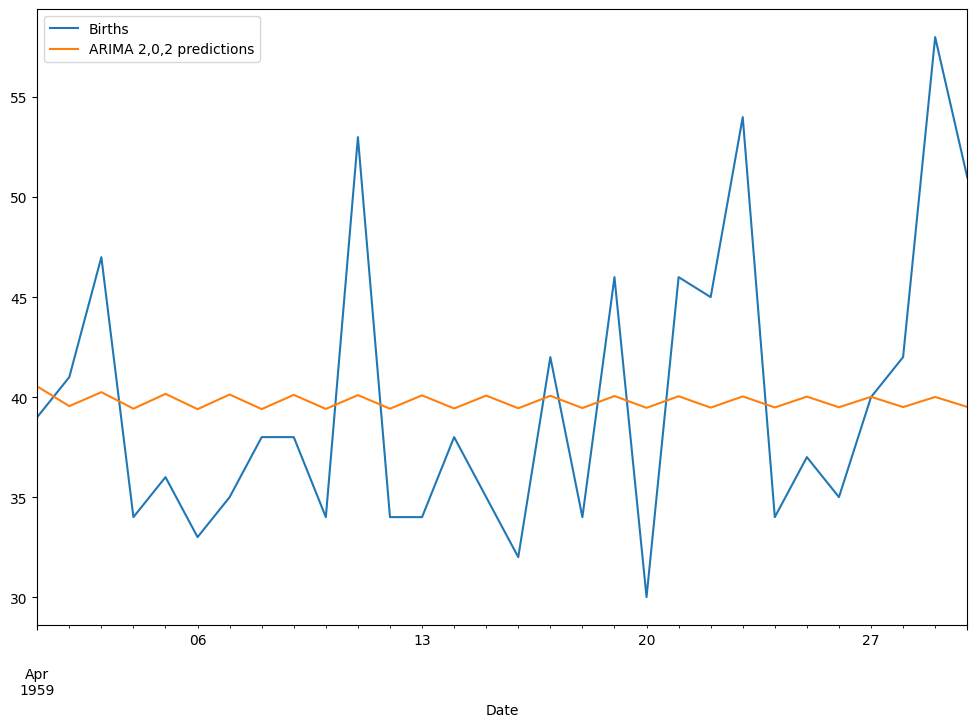

In [30]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [31]:
test.mean()

Births    39.833333
dtype: float64

In [32]:
predictions.mean()

39.785507935774895

In [33]:
train.mean()

Births    39.766667
dtype: float64

In [34]:
# Import the new ARIMA class
from statsmodels.tsa.arima.model import ARIMA

# Change the line where the model is created to:
model1 = ARIMA(train['Births'], order=(0, 0,0))
results = model1.fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                          ARIMA   Log Likelihood                -308.379
Date:                Tue, 07 May 2024   AIC                            620.759
Time:                        13:44:34   BIC                            625.759
Sample:                    01-01-1959   HQIC                           622.775
                         - 03-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7667      0.786     50.609      0.000      38.227      41.307
sigma2        55.4236     10.155      5.458      0.000      35.520      75.327
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.41   Prob(JB):                         0.42
Heteroskedasticity (H):               0.90   Skew:                             0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
predictions1 = results.predict(start,end).rename('ARIMA 0,0,0 predictions')

<Axes: xlabel='Date'>

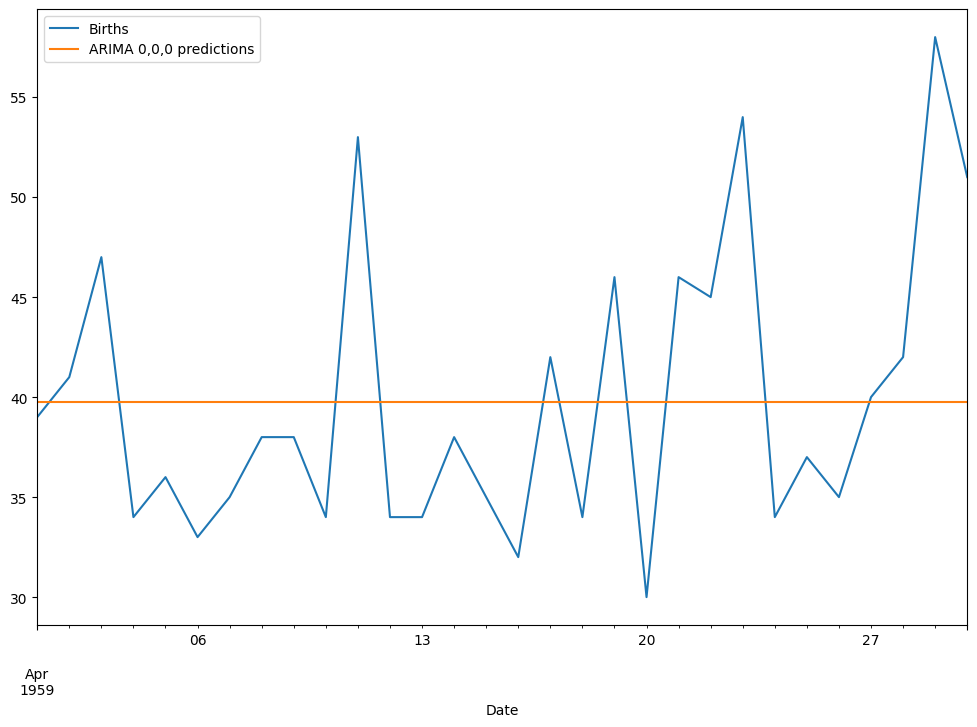

In [37]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

In [38]:
y1 = test.mean()
y2 = predictions.mean()

In [39]:
y1

Births    39.833333
dtype: float64

In [40]:
y2

39.785507935774895

<Axes: xlabel='Date'>

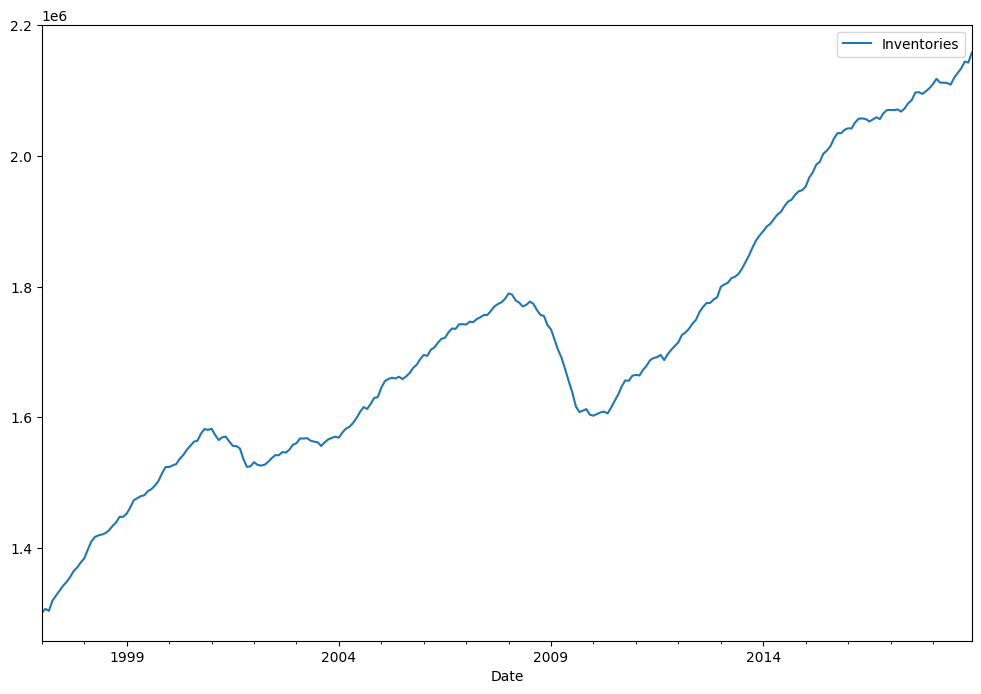

In [41]:
df2.plot(figsize=(12,8))

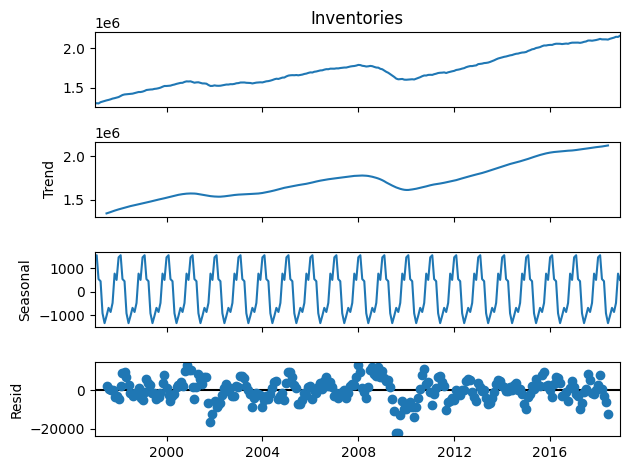

In [43]:
#to check the seasoality of the data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df2['Inventories'],model = 'add')
result.plot();

In [44]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 07 May 2024   AIC                           5348.037
Time:                        14:07:05   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.statespace.tools import diff
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [46]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


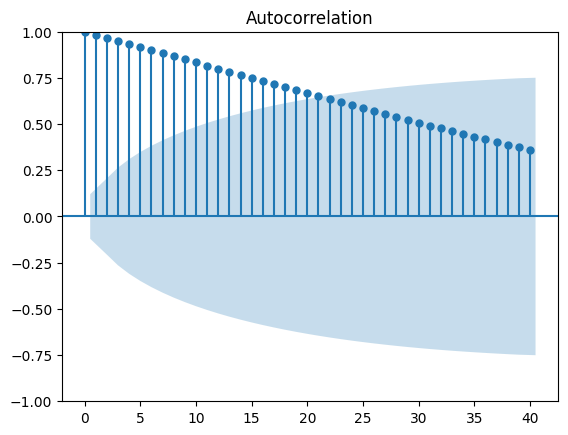

In [48]:
#p for AR component
#q for MA component
plot_acf(df2['Inventories'],lags=40);

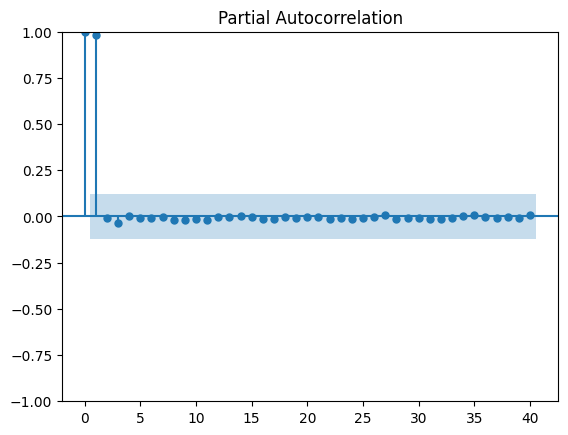

In [50]:
plot_pacf(df2['Inventories'],lags=40);

In [52]:
#identiifing the values of p (auto-regressive term) & q (moving average term)
#p = If the PACF of differenced series displays a sharp cutoff and/or the lag-1 auto-correlation is positive--i.e. if the series appeared slightly underdifferenced
#then consider an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR term.

#If PACF graph has sudden cut-off & ACF graph decays slowly then we can add an AR term or can put MA term 0 or 1.

In [53]:
stepwise_fit = auto_arima(df2['Inventories'],start_p = 0,star_q = 0,max_p = 4,max_q = 4,seasonal=False,trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5352.730, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.86 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.739 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 07 May 2024   AIC                           5348.037
Time:                        14:28:25   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [55]:
model = ARIMA(train['Inventories'],order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2579.217
Date:                Tue, 07 May 2024   AIC                           5160.434
Time:                        14:31:38   BIC                           5163.959
Sample:                    01-01-1997   HQIC                          5161.852
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.911e+07   4.75e+06     10.330      0.000    3.98e+07    5.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               105.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start,end=end,typ = 'levels').rename('ARIMA(0,1,0) predictions') #typ = linear : differnced data, typ = levels : original data

<Axes: xlabel='Date'>

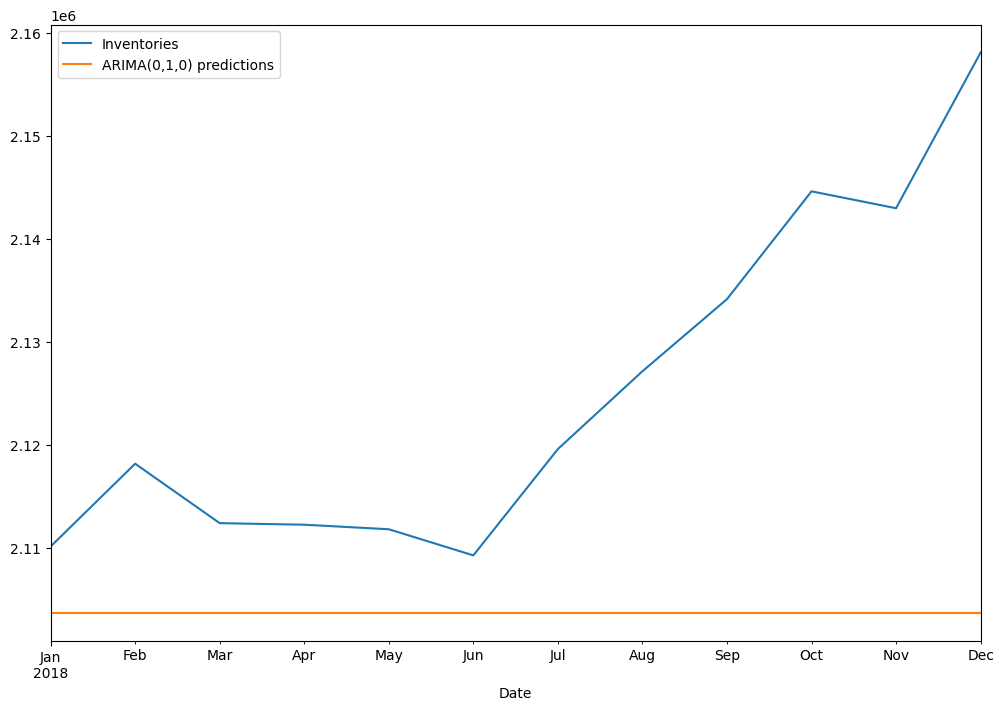

In [57]:
test['Inventories'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [61]:
model1 = ARIMA(train['Inventories'],order=(1,1,1))
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2563.915
Date:                Tue, 07 May 2024   AIC                           5133.830
Time:                        14:38:03   BIC                           5144.406
Sample:                    01-01-1997   HQIC                          5138.086
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    510.677      0.000       0.996       1.004
ma.L1         -0.9999      0.039    -25.958      0.000      -1.075      -0.924
sigma2      2.954e+07    5.2e-10   5.68e+16      0.000    2.95e+07    2.95e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.23   Jarque-Bera (JB):               102.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -1.19
Prob(H) (two-sided):                  0.64   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.6e+31. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

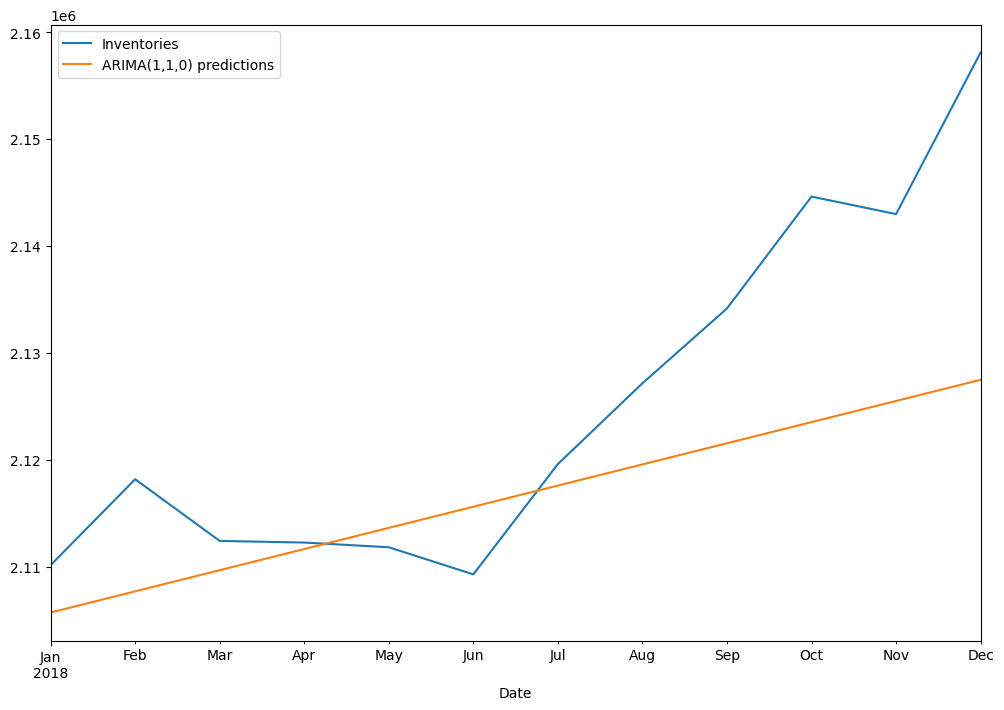

In [62]:
start = len(train)
end = len(train)+len(test)-1
predictions1 = results1.predict(start=start,end=end,typ = 'levels').rename('ARIMA(1,1,0) predictions') #typ = linear : differnced data, typ = levels : original data

test['Inventories'].plot(figsize=(12,8),legend=True)
predictions1.plot(legend=True)

In [63]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'],predictions1)
error

13194.91466397753

In [64]:
test['Inventories'].mean()

2125075.6666666665

In [65]:
#forecast for unknown features
model1 = ARIMA(df2['Inventories'],order=(1,1,1))
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2672.754
Date:                Tue, 07 May 2024   AIC                           5351.508
Time:                        14:40:58   BIC                           5362.225
Sample:                    01-01-1997   HQIC                          5355.815
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    503.237      0.000       0.996       1.004
ma.L1         -0.9998      0.020    -48.932      0.000      -1.040      -0.960
sigma2      4.173e+07   1.33e-11   3.13e+18      0.000    4.17e+07    4.17e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):                95.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -1.13
Prob(H) (two-sided):                  0.66   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+34. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

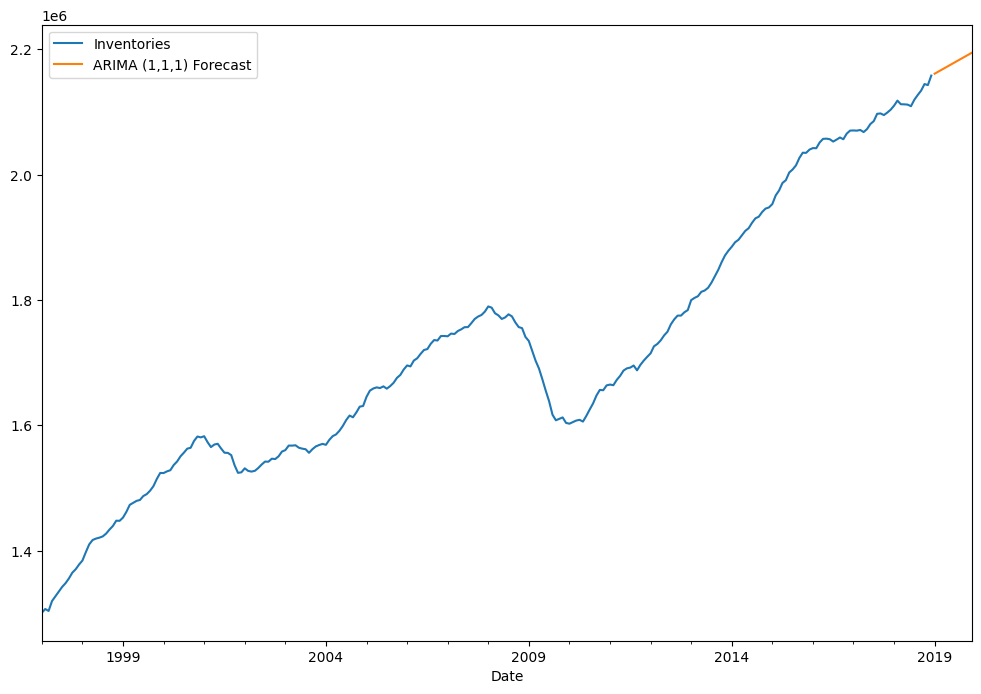

In [66]:
fcast = results1.predict(start = len(df2),end=len(df2)+11,typ='levels').rename('ARIMA (1,1,1) Forecast')
df2['Inventories'].plot(legend=True,figsize=(12,8))
fcast.plot(legend=True)